# Traffic Signs Recognition using CNN & Keras

In [1]:
!pip install tensorflow keras sklearn matplotlib pandas pil


  Using cached sklearn-0.0.tar.gz (1.1 kB)


ERROR: Could not find a version that satisfies the requirement pil
ERROR: No matching distribution found for pil


In [2]:
!pip install opencv-python

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\LENOVO'

In [3]:
cd C:\Users\LENOVO\Desktop\DataSets\Train

C:\Users\LENOVO\Desktop\DataSets\Train


In [4]:
os.getcwd()

'C:\\Users\\LENOVO\\Desktop\\DataSets\\Train'

# The Dataset 

In [10]:
# loading dataset
data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in os.listdir(cur_path):
    dir = cur_path + '/' + i
    for j in os.listdir(dir):
        img_path = dir+'/'+j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img, (30,30), interpolation = cv2.INTER_NEAREST)
        data.append(img)
        labels.append(i)
        
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(40049, 30, 30, 3) (40049,)


In [11]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(40049, 30, 30, 3) (40049,)
(32039, 30, 30, 3) (8010, 30, 30, 3) (32039,) (8010,)


In [13]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 44)
y_test = to_categorical(y_test, 44)

In [14]:
y_train.shape, y_test.shape

((32039, 44), (8010, 44))

# Show Datasets in CSV Formet

In [15]:
train_data=pd.read_csv('C:\\Users\LENOVO\Desktop\DataSets\Train.csv',usecols=['ClassId','Path','Width','Height'],)
test_data=pd.read_csv('C:\\Users\LENOVO\Desktop\DataSets\Test.csv',usecols=['ClassId','Path','Width','Height'],)

train_data.rename({'ClassId':'label','Path':'path'},inplace=True,axis=1)
test_data.rename({'ClassId':'label','Path':'path'},inplace=True,axis=1)

train_data.head()




,Width,Height,label,path
0,27,26,20,Train/20/00020_00000_00000.png
1,28,27,20,Train/20/00020_00000_00001.png
2,29,26,20,Train/20/00020_00000_00002.png
3,28,27,20,Train/20/00020_00000_00003.png
4,28,26,20,Train/20/00020_00000_00004.png


In [16]:
test_data.head()



,Width,Height,label,path
0,53,54,16,Test/00000.png
1,42,45,1,Test/00001.png
2,48,52,38,Test/00002.png
3,27,29,33,Test/00003.png
4,60,57,11,Test/00004.png


In [17]:
print('NO. of classes')
print(train_data['label'].nunique())

NO. of classes
43


In [18]:
cd C:\Users\LENOVO\Desktop\DataSets

C:\Users\LENOVO\Desktop\DataSets


# Let's Visualize the testing Data

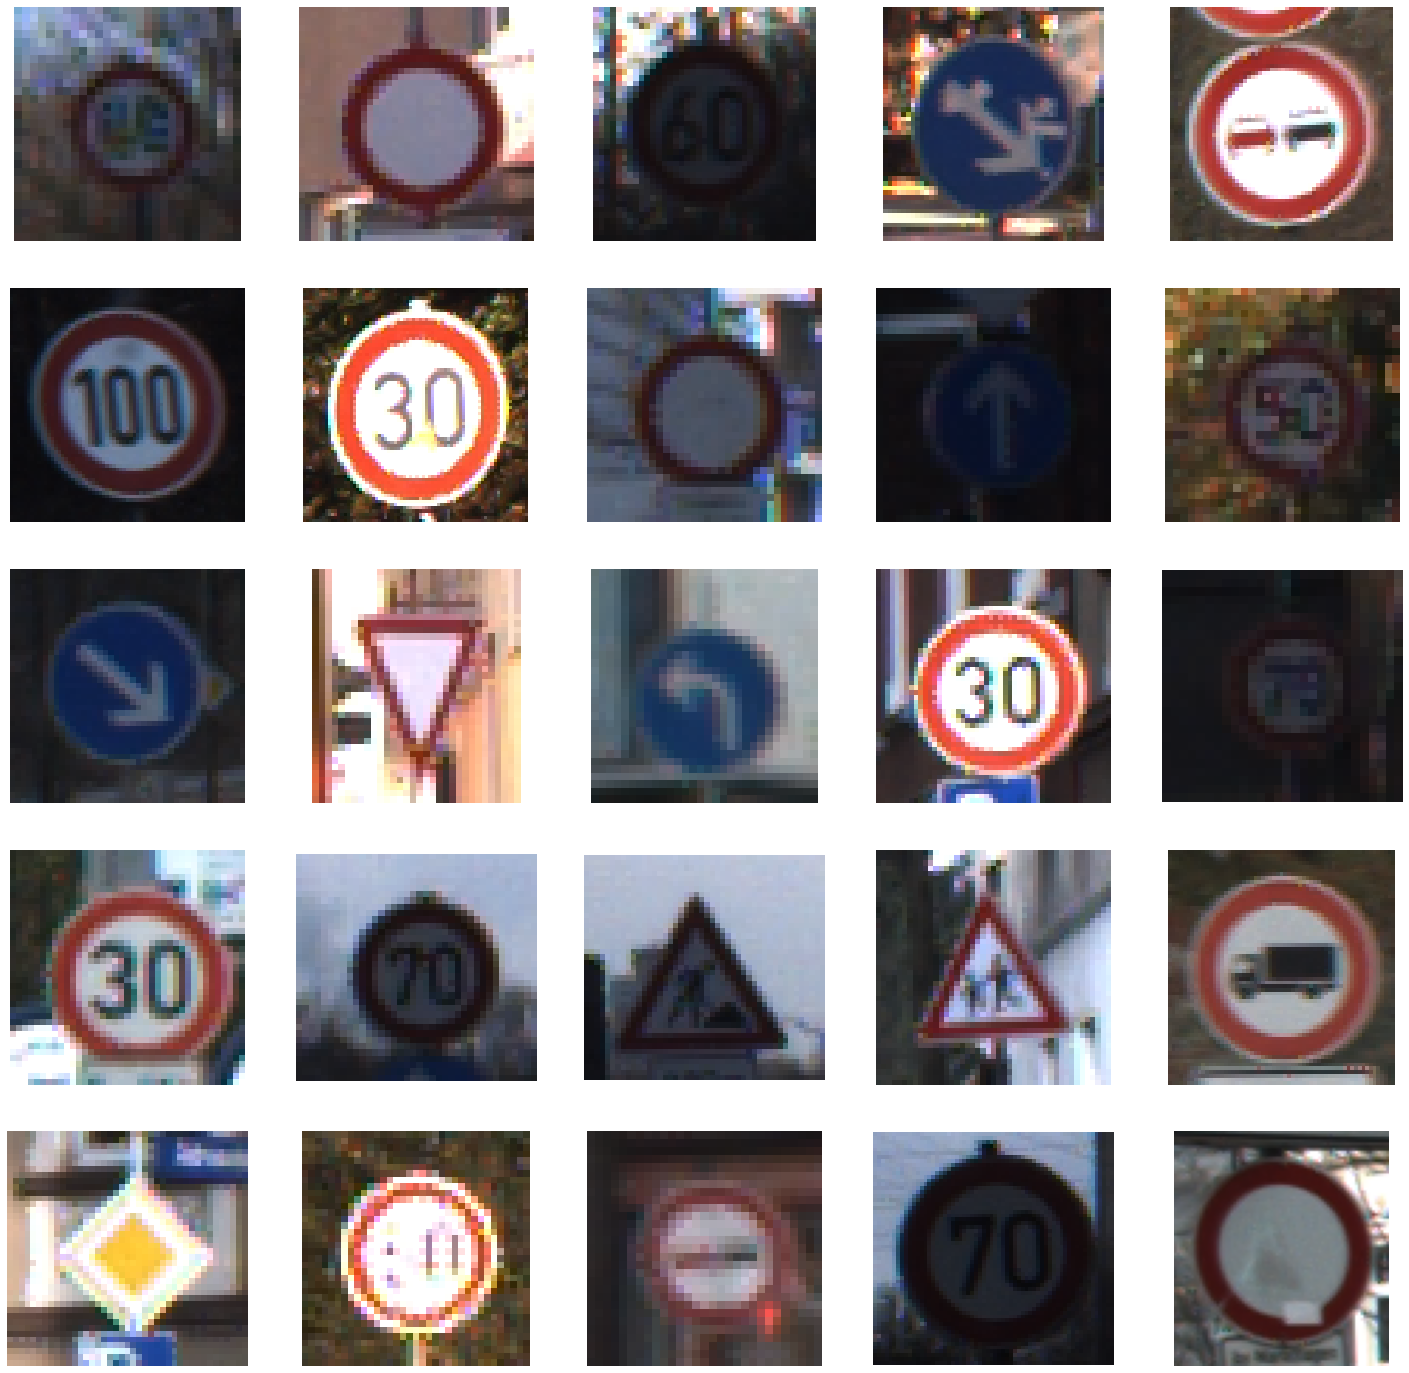

In [19]:
import random
from matplotlib.image import imread
data_dir= os.getcwd()
imgs=test_data['path'].values
plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_image_path=data_dir+'/'+random.choice(imgs)
    random_image=imread(random_image_path)
    plt.imshow(random_image)
    plt.grid(b=None)
    plt.axis('off')
    plt.xlabel(random_image.shape[0],fontsize=20)
    plt.ylabel(random_image.shape[0],fontsize=20)
    
    


In [20]:
cd C:\\Users\LENOVO\Desktop\DataSets\Train

C:\Users\LENOVO\Desktop\DataSets\Train


# Let's Visualize the Training Datasets in Sorted grids formet

Text(0, 0.5, 'Number of images')

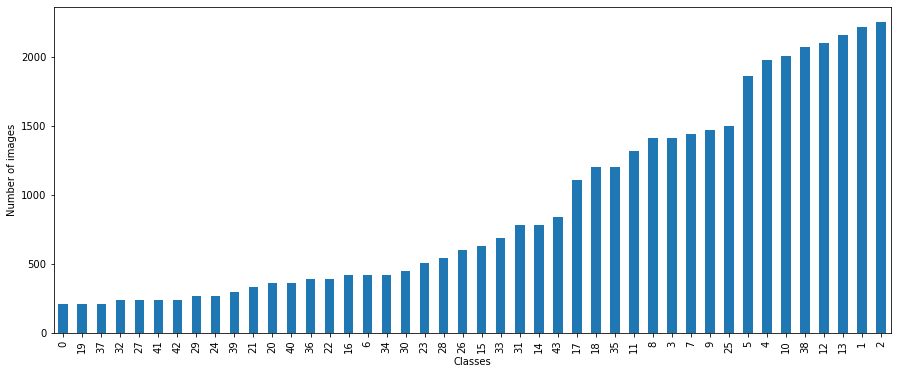

In [21]:
# number of images in each class
data_dic = {}
for folder in os.listdir(cur_path):
    data_dic[folder] = len(os.listdir(cur_path + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Classes')
plt.ylabel('Number of images')

# Build a CNN model 1



In [27]:
#Building the model
model = Sequential()

# First Layer
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Layer 
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))


# Dense Layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(44, activation='softmax'))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        2432      
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 11, 11, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 64)          36928     
                                                      

In [29]:
!pip install visualkeras
import visualkeras

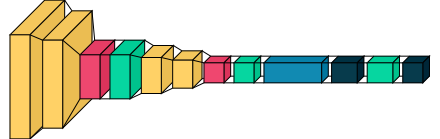

In [25]:
visualkeras.layered_view(model)

# Train and validate the model

In [30]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 20
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model1.h5")

Epoch 1/20
501/501 [==============================] - 72s 142ms/step - loss: 2.3364 - accuracy: 0.4312 - val_loss: 0.7623 - val_accuracy: 0.8170
Epoch 2/20
501/501 [==============================] - 76s 153ms/step - loss: 0.8423 - accuracy: 0.7569 - val_loss: 0.2831 - val_accuracy: 0.9302
Epoch 3/20
501/501 [==============================] - 74s 148ms/step - loss: 0.5200 - accuracy: 0.8484 - val_loss: 0.1981 - val_accuracy: 0.9497
Epoch 4/20
501/501 [==============================] - 72s 143ms/step - loss: 0.3904 - accuracy: 0.8848 - val_loss: 0.1230 - val_accuracy: 0.9685
Epoch 5/20
501/501 [==============================] - 69s 139ms/step - loss: 0.3352 - accuracy: 0.9005 - val_loss: 0.1110 - val_accuracy: 0.9679
Epoch 6/20
501/501 [==============================] - 63s 126ms/step - loss: 0.2883 - accuracy: 0.9176 - val_loss: 0.0863 - val_accuracy: 0.9768
Epoch 7/20
501/501 [==============================] - 60s 119ms/step - loss: 0.2659 - accuracy: 0.9216 - val_loss: 0.0919 - val_ac

# Plotting graphs for accuracy 

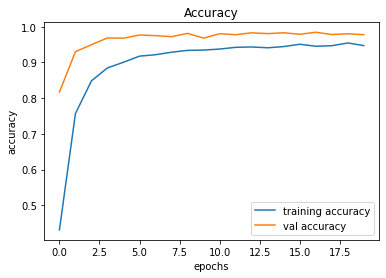

In [31]:
#plotting graphs for accuracy 
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

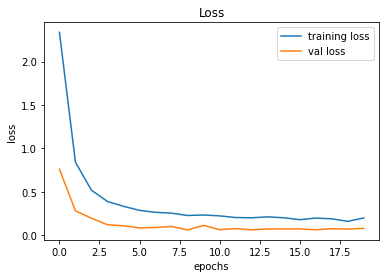

In [32]:

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Evalution


In [33]:
# Score
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss', score[0])
print('Test accuracy', score[1])

Test Loss 0.0816882774233818
Test accuracy 0.9777777791023254


In [34]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

In [35]:

from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        39
           1       0.97      0.97      0.97       483
           2       0.96      0.99      0.97       436
           3       0.99      0.98      0.98       291
           4       0.96      0.99      0.98       403
           5       0.97      0.96      0.97       357
           6       1.00      0.99      0.99        93
           7       0.95      0.99      0.97       318
           8       0.98      0.95      0.97       264
           9       1.00      0.99      1.00       302
          10       1.00      1.00      1.00       399
          11       0.99      0.99      0.99       265
          12       0.98      0.99      0.98       439
          13       0.99      1.00      0.99       421
          14       1.00      0.98      0.99       144
          15       0.99      0.99      0.99       110
          16       1.00      1.00      1.00        78
          17       0.99    

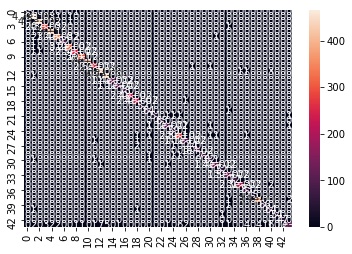

In [36]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_class, y_pred_class)
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.savefig('h1.png')

In [37]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred_class,y_test_class)
score

0.9777777777777777

In [38]:
model.save('traffic_classifier1.h5')

# Build the Simple App Using Tkinter

In [68]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

import numpy
#load the trained model to classify sign
from keras.models import load_model
model = load_model('traffic_classifier1.h5')

#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons',
            44:'non traffic signs'}

#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')

label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    predict_x=model.predict(image)
    classes_x=numpy.argmax(predict_x,axis=1)
    sign = classes[int(classes_x)+1]
    print(sign)
    label.configure(foreground='#011638', text=sign) 

def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/4.25),(top.winfo_height()/4.25)))
        im=ImageTk.PhotoImage(uploaded)

        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload=Button(top,text="Upload an image",command=upload_image,padx=30,pady=10)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))

upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

Speed limit (60km/h)
Speed limit (60km/h)


In [11]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

import numpy
#load the trained model to classify sign
from keras.models import load_model
model = load_model('traffic_classifier.h5')
model_2= load_model('traffic_classifier3.h5')
model_3= load_model('traffic_classifier2.h5')



#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons',
            44:'non traffic signs'}



#initialise GUI
top=tk.Tk()
top.geometry('1900x1000')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')
#cnn 2 layer
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)

#cnn 3 layer
label_2=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image_2 = Label(top)

#cnn 3 layer
label_3=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image_3 = Label(top)

#cnn 2 layer
def classify(file_path):
    try:
        global label_packed
        image = Image.open(file_path)
        image = image.resize((30,30))
        image = numpy.expand_dims(image, axis=0)
        image = numpy.array(image)
        predict_x=model.predict(image)
        classes_x=numpy.argmax(predict_x,axis=1)
        sign = classes[int(classes_x)+1]
        print(sign)
        label.configure(foreground='#011638', text=sign) 
        label.place(relx=0.12,rely=0.16)
    except  ValueError:
        print("image size is incompatible")
        label.configure(foreground='#011638', text="image size is incompatible") 
        label.place(relx=0.12,rely=0.16)

# cnn 3 layer
def classify_2(file_path):
    try:
        
        global label_packed
        image = Image.open(file_path)
        image = image.resize((30,30))
        image = numpy.expand_dims(image, axis=0)
        image = numpy.array(image)
        predict_x=model_2.predict(image)
        classes_x=numpy.argmax(predict_x,axis=1)
        sign = classes[int(classes_x)+1]
        print(sign)
        label_2.configure(foreground='#011638', text=sign) 
        label_2.place(relx=0.43,rely=0.16)
    except  ValueError:
        print("image size is incompatible")
        label_2.configure(foreground='#011638', text="image size is incompatible") 
        label_2.place(relx=0.43,rely=0.16)
        

#VGG16 layer
def classify_3(file_path):
    try:
        
        global label_packed
        image = Image.open(file_path)
        image = image.resize((30,30))
        image = numpy.expand_dims(image, axis=0)
        image = numpy.array(image)
        predict_x=model_3.predict(image)
        classes_x=numpy.argmax(predict_x,axis=1)
        sign = classes[int(classes_x)+1]
        print(sign)
        label_3.configure(foreground='#011638', text=sign) 
        label_3.place(relx=0.80,rely=0.16)
    except  ValueError:
        print("image size is incompatible")
        label_3.configure(foreground='#011638', text="image size is incompatible") 
        label_3.place(relx=0.80,rely=0.16)
    
    
#cnn 2 layer
def show_classify_button(file_path):
    
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.04,rely=0.80)

        
    
#cnn 3 layer
def show_classify_button_2(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify_2(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.34,rely=0.80)
    
#VGG 16 layer
def show_classify_button_3(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify_3(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.68,rely=0.80)

#cnn 2 layer
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/4.25),(top.winfo_height()/4.25)))
        im=ImageTk.PhotoImage(uploaded)

        sign_image.configure(image=im)
        sign_image.image=im
        sign_image.place(relx=0.09,rely=0.36)
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
    
#cnn 3 layer
def upload_image_2():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/4.25),(top.winfo_height()/4.25)))
        im=ImageTk.PhotoImage(uploaded)

        sign_image_2.configure(image=im)
        sign_image_2.image=im
        sign_image_2.place(relx=0.43,rely=0.36)
        label_2.configure(text='')
        show_classify_button_2(file_path)
    except:
        pass
    
#VGG16 layer
def upload_image_3():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/4.25),(top.winfo_height()/4.25)))
        im=ImageTk.PhotoImage(uploaded)

        sign_image_3.configure(image=im)
        sign_image_3.image=im
        sign_image_3.place(relx=0.80,rely=0.36)
        label_3.configure(text='')
        show_classify_button_3(file_path)
    except:
        pass


#cnn 2 layer
upload=Button(top,text="Upload an image of model 1",command=upload_image,padx=30,pady=10)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))

upload.pack(side=BOTTOM,pady=50)
upload.place(relx=0.13,rely=0.80)
#sign_image.pack(side=BOTTOM,expand=True)
#label.pack(side=BOTTOM,expand=True)

#cnn 3 layer
upload_2=Button(top,text="Upload an image of model 2",command=upload_image_2,padx=30,pady=10)
upload_2.configure(background='#364156', foreground='white',font=('arial',10,'bold'))

upload_2.pack(side=BOTTOM,pady=50)
upload_2.place(relx=0.43,rely=0.80)

#VGG16 layer
upload_3=Button(top,text="Upload an image of VGG16 model",command=upload_image_3,padx=30,pady=10)
upload_3.configure(background='#364156', foreground='white',font=('arial',10,'bold'))

upload_3.pack(side=BOTTOM,pady=50)
upload_3.place(relx=0.78,rely=0.80)

heading = Label(top, text="Traffic Sign Recognition",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

Dangerous curve right
Turn right ahead
non traffic signs
Bicycles crossing
Beware of ice/snow
Priority road
Speed limit (30km/h)
image size is incompatible
